In [57]:
import sys
sys.path.insert(0,'..')
import cocpit.plot as plot
import cocpit
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import seaborn as sns
from sklearn.metrics import confusion_matrix
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
plt_params = {'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.title_fontsize': 12}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

### plot confusion matrix on validation dataloader

In [24]:
model = torch.load('/data/data/saved_models/no_mask/e30_bs64_k0_1models_v1.0.0_removed_vgg16').cuda()
val_data = torch.load('/data/data/saved_val_loaders/no_mask/val_loader30_bs64_k0_1models_v1.0.0_removed.pt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size=64
# class_names = ['aggs','blank','blurry','budding',
#               'bullets','columns','compact irregulars',
#               'fragments','needles','plates','rimed aggs',
#               'rimed columns','spheres']
class_names = ['aggregates','blank', 'budding',
              'bullets','columns','compact\n irregulars',
              'fragments','plates','rimed',
              'spheres']
#get predictions from val loader 
all_preds, all_labels = cocpit.data_loaders.get_val_loader_predictions(model, val_data, device, batch_size)

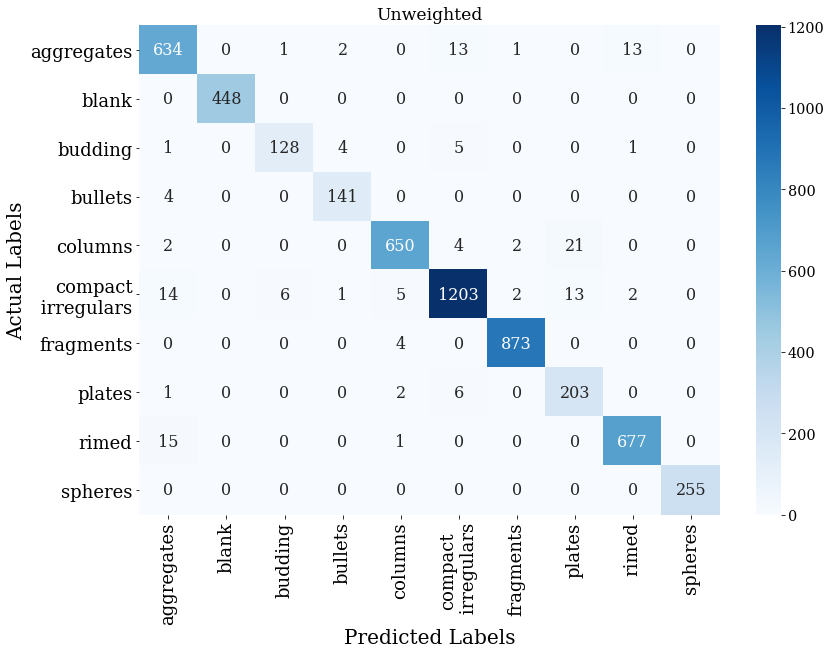

In [22]:
#plot/save conf matrix
cocpit.classification_metrics.plot_confusion_matrix(all_preds, all_labels,
                                                    class_names, norm=False, save_fig=False)

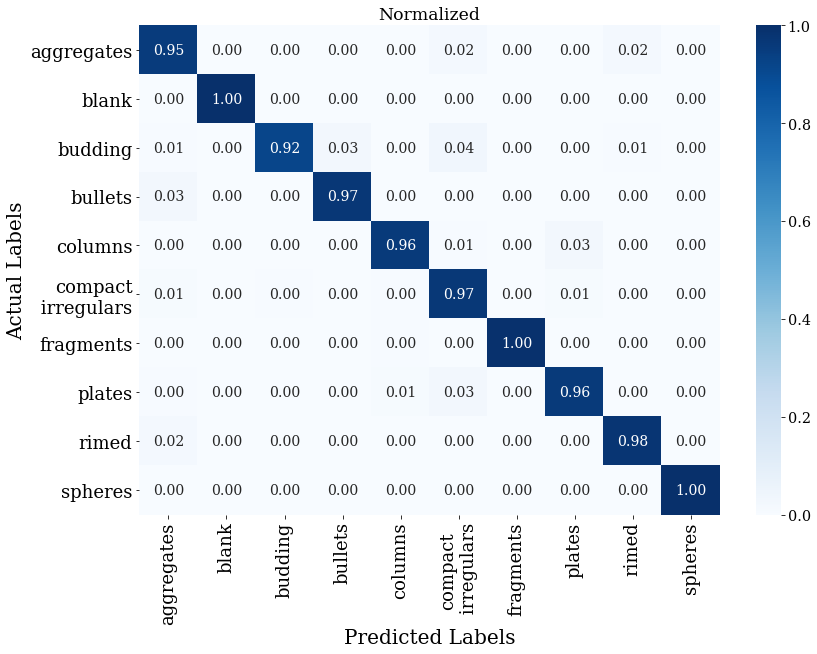

In [15]:
#plot/save normalized conf matrix
cocpit.classification_metrics.plot_confusion_matrix(all_preds, all_labels,
                                                    class_names, norm=True, save_fig=False)

### classification report w.r.t. each model - average kfold

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, macro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

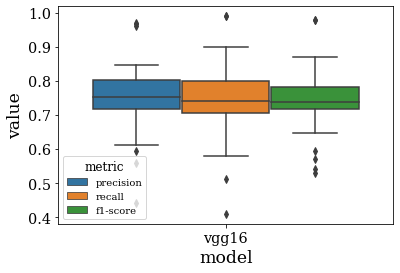

In [18]:
metric_filename = '/data/data/saved_accuracies/no_mask/save_val_metrics_e1_bs64_k2_1.csv'
#plot/save metrics w.r.t model
cocpit.classification_metrics.plot_model_metric_folds(metric_filename)

### plot precision, recall, and f1-score w.r.t. each class

                      precision    recall  f1-score
aggregates             0.954819  0.944858  0.949813
blank                  1.000000  1.000000  1.000000
budding                0.920863  0.948148  0.934307
bullets                0.972414  0.952703  0.962457
columns                0.957290  0.981873  0.969426
compact\n irregulars   0.965490  0.977254  0.971336
fragments              0.995439  0.994305  0.994872
plates                 0.957547  0.856540  0.904232
rimed                  0.976912  0.976912  0.976912
spheres                1.000000  1.000000  1.000000
accuracy               0.972751  0.972751  0.972751
macro avg              0.970077  0.963259  0.966335
weighted avg           0.972769  0.972751  0.972597


<AxesSubplot:>

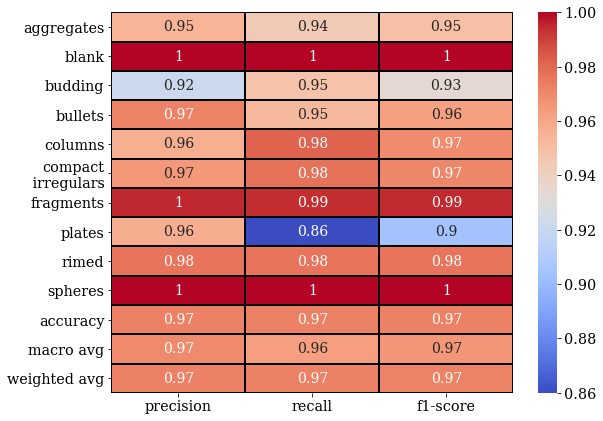

In [134]:
clf_report = cocpit.classification_metrics.metrics_report(all_labels, all_preds, class_names)
cocpit.classification_metrics.plot_classification_report_classes(clf_report)

<AxesSubplot:>

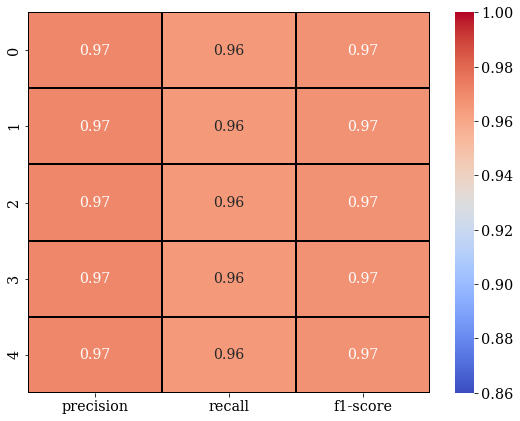

In [156]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(grouped_df.drop(columns='fold'), annot=True, cmap='coolwarm',
            linecolor='k', linewidths=1, annot_kws={"fontsize": 14}, vmin=0.86, vmax=1.00)


### plot batch size vs val acc

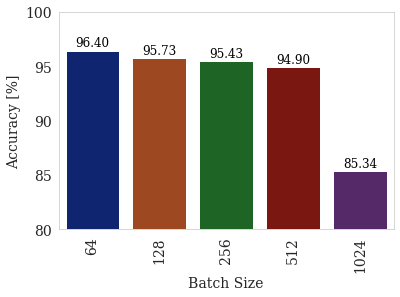

In [39]:
val_csv = '/data/data/saved_accuracies/no_mask/save_val_acc_loss_batchsize_compare_vgg16_k0_10classes.csv'
save_name = '/data/data/plots/batch_size_vs_val_acc.pdf'
plot.plot_batch_size_accuracy(val_csv, save_name, save_fig=False)

## plot training and validation accuracy and loss

In [40]:
#rename models for plotting
model_names = ['efficient', 'resnet18', 'resnet34',
               'resnet152', 'alexnet', 'vgg16', 'vgg19',
               'densenet169', 'densenet201']
new_names = ['Efficient-b0', 'ResNet-18', 'ResNet-34',
               'ResNet-152', 'AlexNet', 'VGG-16', 'VGG-19',
               'DenseNet-169', 'DenseNet-201']
convert_names = {model_names[i]: new_names[i] for i in range(len(new_names))}
convert_names

{'efficient': 'Efficient-b0',
 'resnet18': 'ResNet-18',
 'resnet34': 'ResNet-34',
 'resnet152': 'ResNet-152',
 'alexnet': 'AlexNet',
 'vgg16': 'VGG-16',
 'vgg19': 'VGG-19',
 'densenet169': 'DenseNet-169',
 'densenet201': 'DenseNet-201'}

In [41]:
train_csv = '/data/data/saved_accuracies/no_mask/save_train_acc_loss_e30_bs128_k0_9models.csv' 
df_train = pd.read_csv(train_csv, names=["Model", "Epoch", "Kfold", "Accuracy", "Loss"])
df_train.replace(convert_names, inplace=True)
df_train.head()

,Model,Epoch,Kfold,Accuracy,Loss
0,Efficient-b0,0,0,0.535719,1.605311
1,Efficient-b0,1,0,0.854836,0.402541
2,Efficient-b0,2,0,0.910690,0.256728
3,Efficient-b0,3,0,0.941160,0.180129
4,Efficient-b0,4,0,0.946246,0.165409


In [42]:
val_csv = '/data/data/saved_accuracies/no_mask/save_val_acc_loss_e30_bs128_k0_9models.csv'
df_val = pd.read_csv(val_csv, names=["Model", "Epoch", "Kfold", "Accuracy", "Loss"])
df_val.replace(convert_names, inplace=True)
df_val.head()

,Model,Epoch,Kfold,Accuracy,Loss
0,Efficient-b0,0,0,0.227697,4.406654
1,Efficient-b0,1,0,0.044793,3.758383
2,Efficient-b0,2,0,0.488988,1.531307
3,Efficient-b0,3,0,0.843785,0.424839
4,Efficient-b0,4,0,0.888951,0.292595


In [43]:
colors = {'Efficient-b0': '#C76114', 'ResNet-18': '#CAE1FF', 'ResNet-34': '#3063A5', 'ResNet-152': '#162252',
       'AlexNet': '#FCDC3B', 'VGG-16': '#CD9B9B', 'VGG-19': '#9E0508', 'DenseNet-169': '#9CBA7F',
       'DenseNet-201': '#006633'}
num_epochs = int(val_csv[55:57])
kfold = int(val_csv[65:66])
num_models = len(model_names)

In [45]:
#reshape data
if kfold == 0:
    val_accs = df_val['Accuracy'].values.reshape(num_models, num_epochs)
    val_losses = df_val['Loss'].values.reshape(num_models, num_epochs)
    train_accs = df_train['Accuracy'].values.reshape(num_models, num_epochs)
    train_losses = df_train['Loss'].values.reshape(num_models, num_epochs)
else:
    val_accs = np.average(df_val['Accuracy'].values.reshape(num_models, kfold, num_epochs), axis=1)
    val_losses = np.average(df_val['Loss'].values.reshape(num_models, kfold, num_epochs), axis=1)
    train_accs = np.average(df_train['Accuracy'].values.reshape(num_models, kfold, num_epochs), axis=1)
    train_losses = np.average(df_train['Loss'].values.reshape(num_models, kfold, num_epochs), axis=1)

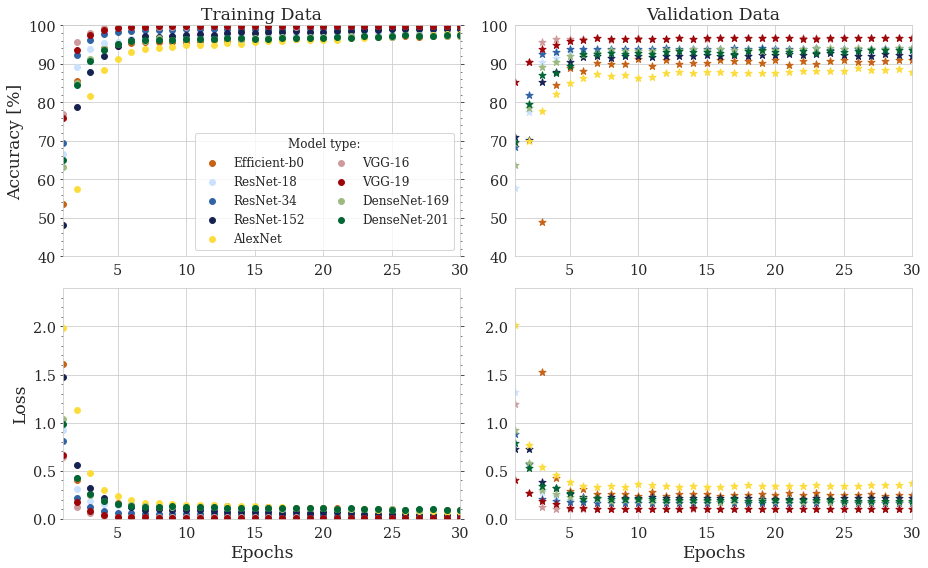

In [52]:
save_name = '/data/data/plots/loss_acc_9models_bs128_e50_13classes_avgkfold.pdf' 
plot.plot_train_val_acc_loss(model_names, num_models, num_epochs, train_accs, colors, new_names,
                            val_accs, train_losses, val_losses, save_name, save_fig=False)

### plot time it takes to train different models

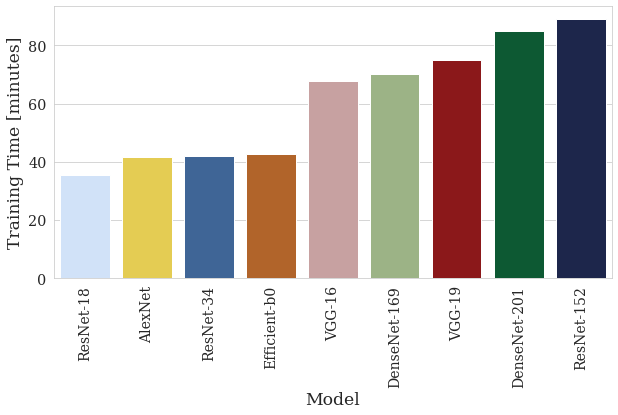

In [56]:
time_csv = '/data/data/saved_timings/model_timing2.csv'
save_name = '/data/data/plots/training_time.pdf'
plot.plot_model_timing(time_csv, convert_names, colors, save_name, save_fig=False)

### plot time it takes to run different samples

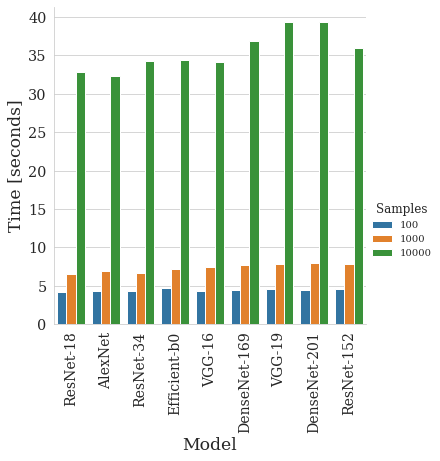

In [55]:
time_csv = '/data/data/saved_timings/model_timing_samples.csv'
save_name = '/data/data/plots/model_timing_samples.pdf'
plot.plot_time_samples(time_csv, save_name, convert_names, save_fig=False)

## plot cross validation

In [16]:
val_accs = df_val['Accuracy'].values.reshape(num_models, kfold, num_epochs)
val_accs_avg = np.average(df_val['Accuracy'].values.reshape(num_models, kfold, num_epochs), axis=1)

In [17]:
val_accs_avg = {new_names[i]: val_accs_avg[i,-1] for i in range(len(model_names))} 
val_accs_avg

{'Efficient-b0': 0.966847186249117,
 'ResNet-18': 0.9601130209559688,
 'ResNet-34': 0.9970331999058158,
 'ResNet-152': 0.9600188368259948,
 'AlexNet': 0.9182952672474688,
 'VGG-16': 0.9964680951259712,
 'VGG-19': 0.9974099364257123,
 'DenseNet-169': 0.9156110195432069,
 'DenseNet-201': 0.89385448551919}

In [18]:
val_accs_avg_sort = dict(sorted(val_accs_avg.items(), key=lambda x: x[1]))
val_accs_avg_sort

{'DenseNet-201': 0.89385448551919,
 'DenseNet-169': 0.9156110195432069,
 'AlexNet': 0.9182952672474688,
 'ResNet-152': 0.9600188368259948,
 'ResNet-18': 0.9601130209559688,
 'Efficient-b0': 0.966847186249117,
 'VGG-16': 0.9964680951259712,
 'ResNet-34': 0.9970331999058158,
 'VGG-19': 0.9974099364257123}

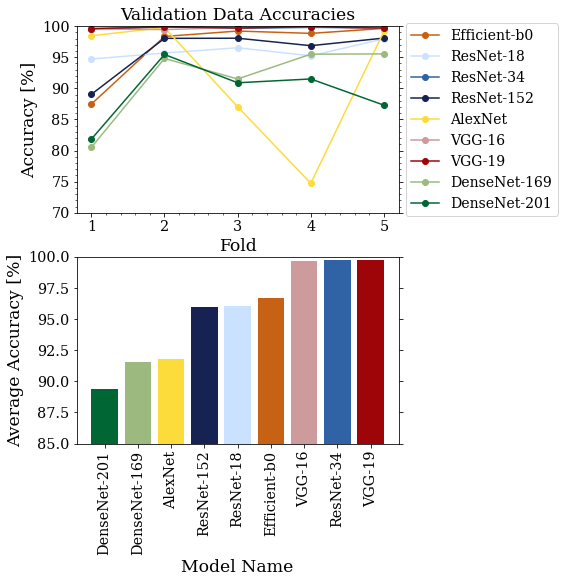

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7), sharex=True, sharey=True)
fig.tight_layout(pad=3.0)
#fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(2, 1, 1)

for i in range(num_models):
    ax1.plot(np.arange(1,(kfold+1)), [i*100 for i in val_accs[i,:,-1]],
                c=colors[new_names[i]], marker='o', label=new_names[i])
plt.ylabel("Accuracy [%]")
plt.xlabel("Fold")
plt.ylim(70,100)
#plt.xlim(1,num_epochs)
#ax1.legend(title='Model type:', loc='best', prop={'size': 12})
# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax1.axes.xaxis.set_ticks(np.arange(1,6,1))
ax1.yaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(axis='y', which='minor', direction='out')
#ax1.xaxis.set_tick_params(which='minor', bottom=False)
ax1.title.set_text('Validation Data Accuracies')

ax2 = plt.subplot(2, 1, 2)
plt.bar(np.arange(1,num_models+1), [i*100 for i in val_accs_avg_sort.values()],
        color=sorted_colors.values())
plt.ylabel("Average Accuracy [%]")
plt.xlabel("Model Name")
plt.ylim(85,100)
#plt.xlim(1,num_epochs)
# Shrink current axis by 20%
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# Set number of ticks for x-axis
ax2.set_xticks(np.arange(1,10))
# Set ticks labels for x-axis
ax2.set_xticklabels(sorted_colors.keys(), rotation='vertical')
ax2.yaxis.set_ticks_position('both')
